<a href="https://colab.research.google.com/github/SADUDDIN/Mall_Customer_Segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dependencies

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Using Z-scores
from scipy import stats

In [78]:
# pip install kaggle

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##EDA

In [142]:
dataset = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [143]:
df= dataset

In [144]:
df.shape

(200, 5)

In [145]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [146]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [147]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [148]:
print(df.to_string())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

In [149]:
print(pd.options.display.max_rows)

60


In [150]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [151]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [152]:
# Calculate quartiles
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)  # Median
q3 = df['Age'].quantile(0.75)

# Count how many fall within each quartile
q1_count = df[df['Age'] <= q1].shape[0]
q2_count = df[(df['Age'] > q1) & (df['Age'] <= q2)].shape[0]
q3_count = df[(df['Age'] > q2) & (df['Age'] <= q3)].shape[0]
q4_count = df[df['Age'] > q3].shape[0]

# Print the counts
print(f"Q1 (<= 25%): {q1_count} records")
print(f"Q2 (25% < x <= 50%): {q2_count} records")
print(f"Q3 (50% < x <= 75%): {q3_count} records")
print(f"Q4 (> 75%): {q4_count} records")

Q1 (<= 25%): 50 records
Q2 (25% < x <= 50%): 54 records
Q3 (50% < x <= 75%): 51 records
Q4 (> 75%): 45 records


In [153]:
# Select all columns except the ones to exclude
columns_to_exclude = ['CustomerID', 'Gender']
df_ex = df[[col for col in df.columns if col not in columns_to_exclude]]


In [154]:
df_ex.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [155]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [156]:
# Retrieve rows where Gender is 'Ma
df[df['Gender'] == 'Female'].count()


,0
CustomerID,112
Gender,112
Age,112
Annual Income (k$),112
Spending Score (1-100),112


In [157]:
df['Annual Income (k$)'].idxmax()

198

In [158]:
 # Retrieve the row with the highest 'Annual Income (k$)'
highest_salary_row = df[df['Annual Income (k$)'] == df['Annual Income (k$)'].max()]

# Display the row
print(highest_salary_row)


     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [159]:
df[df['Age']==df['Age'].max()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [160]:
df['Age']

,Age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


In [161]:
# Retrieve the row with the highest 'Annual Income (k$)' (alternative me
df.nlargest(4, 'Annual Income (k$)')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83
196,197,Female,45,126,28
197,198,Male,32,126,74


In [162]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


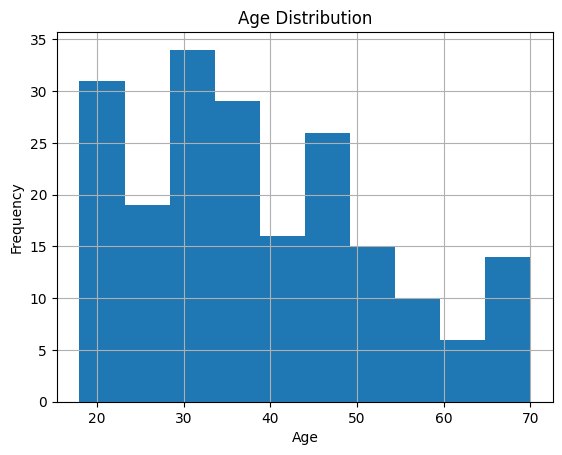

In [163]:

df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [164]:
df[df['Age'] == 30].shape[0]

7

<Axes: >

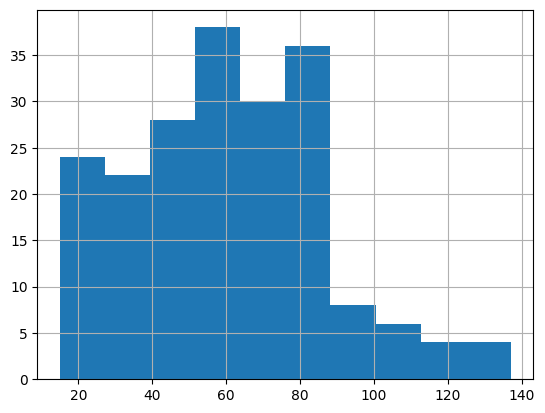

In [165]:
df['Annual Income (k$)'].hist(bins=10)

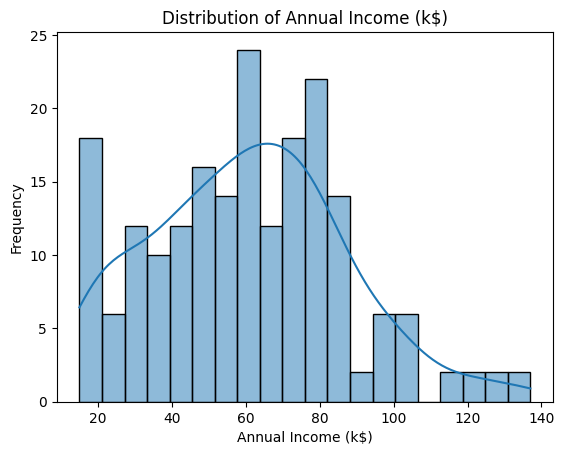

In [166]:
# Distplot using histplot with kde=True
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)

# Set plot labels and title
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

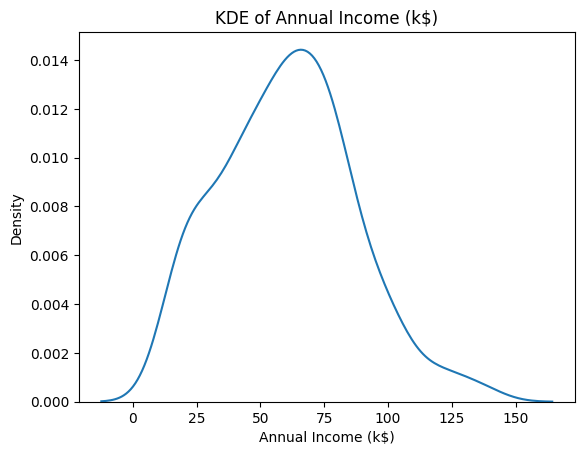

In [167]:
sns.kdeplot(df['Annual Income (k$)'])
plt.title('KDE of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()


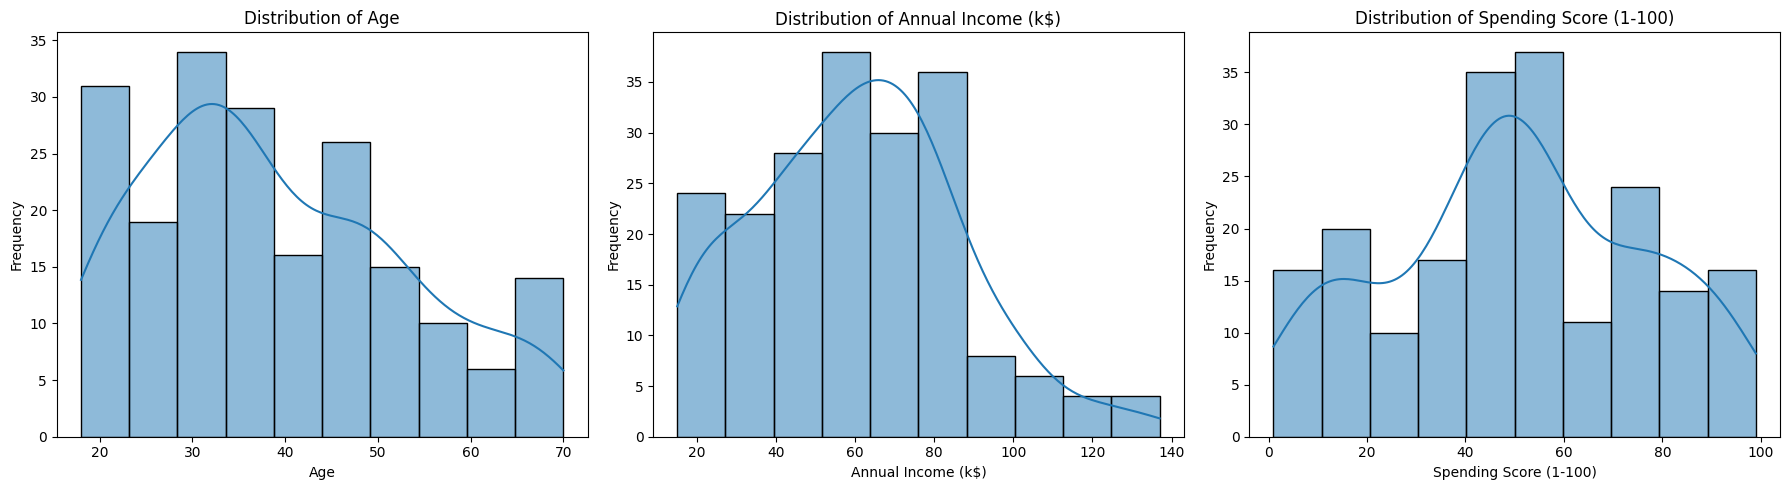

In [168]:


# Set up the matplotlib figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distplot for 'Age'
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot distplot for 'Annual Income (k$)'
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Annual Income (k$)')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')

# Plot distplot for 'Spending Score (1-100)'
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Spending Score (1-100)')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


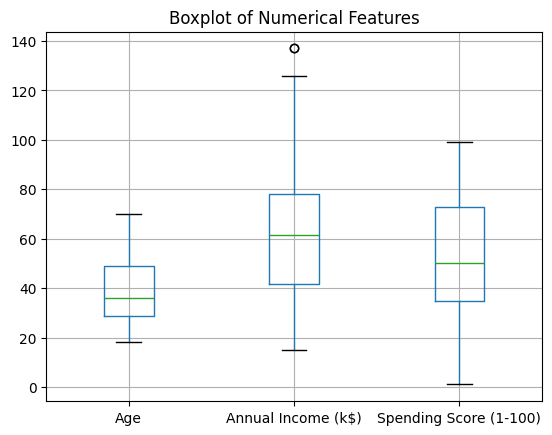

In [169]:
df.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Boxplot of Numerical Features')
plt.show()


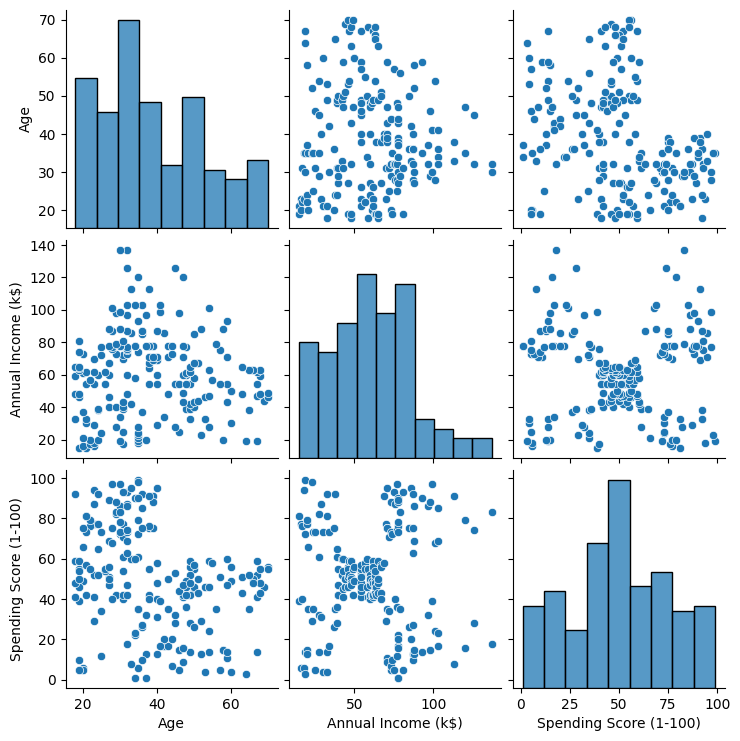

In [170]:

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


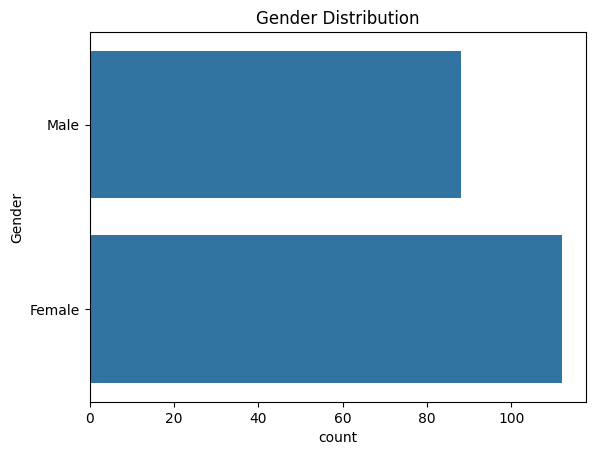

In [171]:
sns.countplot(y='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


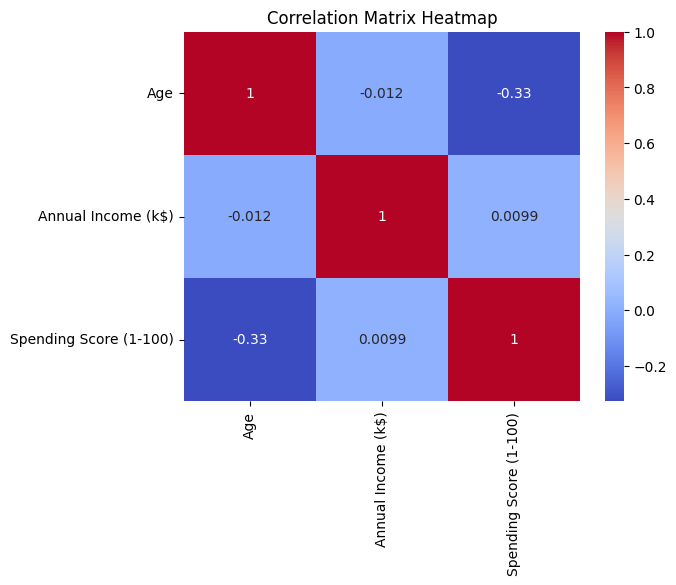

In [172]:
# Correlation matrix
corr_matrix = df_ex.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [173]:

z_scores = stats.zscore(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
outliers = (abs(z_scores) > 3).any(axis=1)
df_outliers = df[outliers]
print(df_outliers)


Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [174]:
# Groupby Gender and calculate mean values
gender_group = df.groupby('Gender').max()
print(gender_group)


        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
Female         197   68                 126                      99
Male           200   70                 137                      97


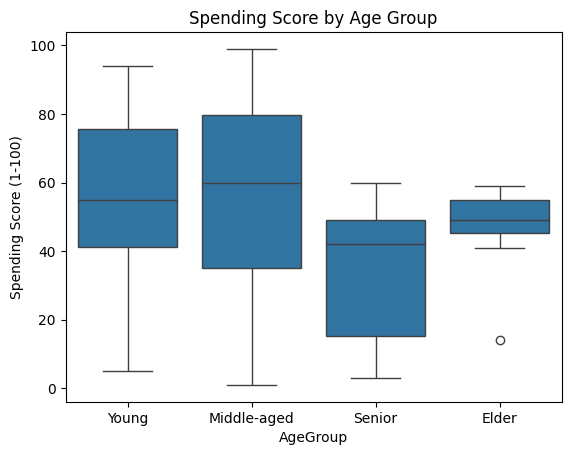

In [175]:
# Create age bins
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elder']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot the distribution of spending score by age group
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Age Group')
plt.show()


### Interquartile Range (IQR) method

In [176]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df_clean = df[((df['Annual Income (k$)'] < (Q1 - 1.5 * IQR)) | (df['Annual Income (k$)'] > (Q3 + 1.5 * IQR)))]


In [177]:
df_clean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
198,199,Male,32,137,18,Middle-aged
199,200,Male,30,137,83,Middle-aged


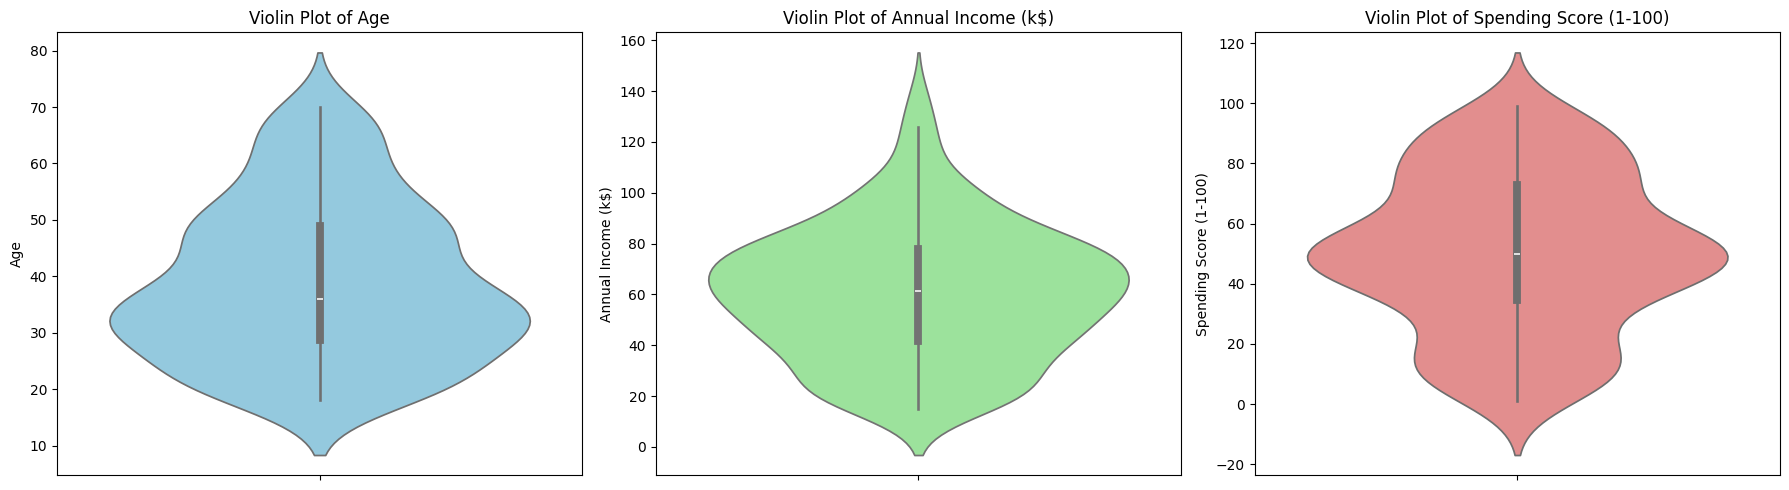

In [178]:

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violin plot for 'Age'
sns.violinplot(y=df['Age'], ax=axes[0], color="skyblue")
axes[0].set_title('Violin Plot of Age')

# Violin plot for 'Annual Income (k$)'
sns.violinplot(y=df['Annual Income (k$)'], ax=axes[1], color="lightgreen")
axes[1].set_title('Violin Plot of Annual Income (k$)')

# Violin plot for 'Spending Score (1-100)'
sns.violinplot(y=df['Spending Score (1-100)'], ax=axes[2], color="lightcoral")
axes[2].set_title('Violin Plot of Spending Score (1-100)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-179-69b0bdd7a262>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, ax=axes[0], palette="Set2")
<ipython-input-179-69b0bdd7a262>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[1], palette="Set2")
<ipython-input-179-69b0bdd7a262>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[2], palette="Set2")


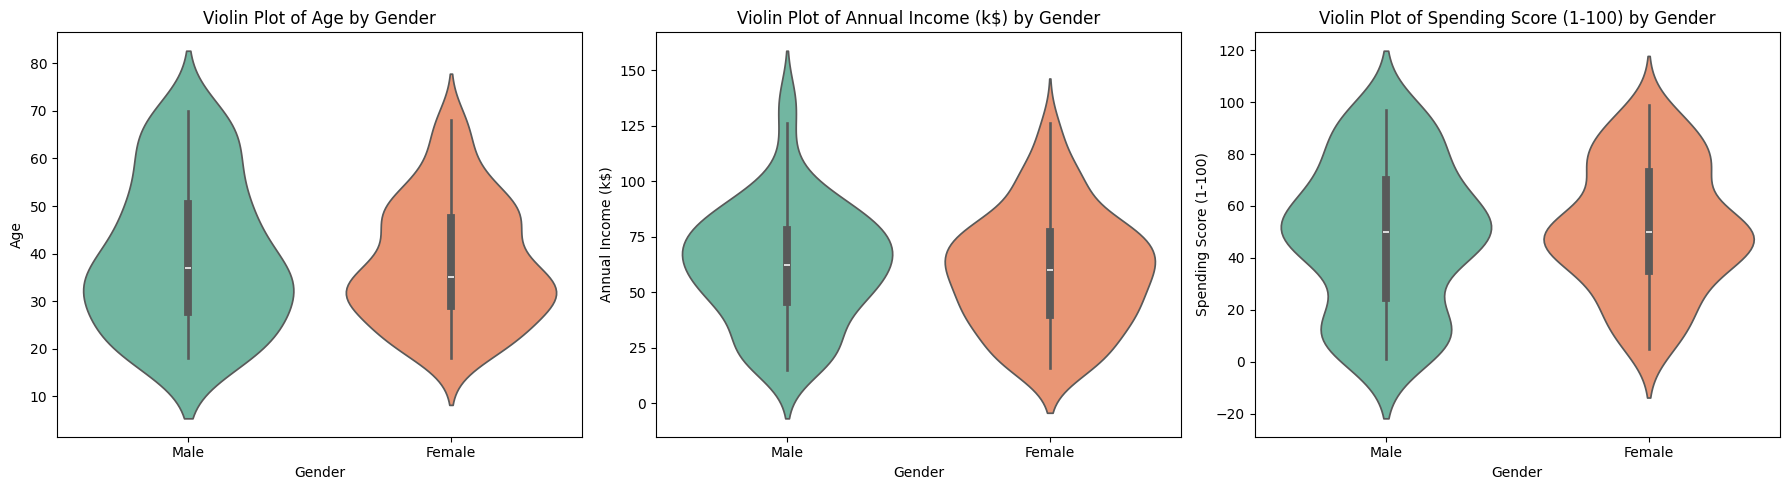

In [179]:

# Set up a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violin plot for 'Age' by Gender
sns.violinplot(x='Gender', y='Age', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Violin Plot of Age by Gender')

# Violin plot for 'Annual Income (k$)' by Gender
sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Violin Plot of Annual Income (k$) by Gender')

# Violin plot for 'Spending Score (1-100)' by Gender
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[2], palette="Set2")
axes[2].set_title('Violin Plot of Spending Score (1-100) by Gender')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [184]:
X = df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values

#Machine learning

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Selecting features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


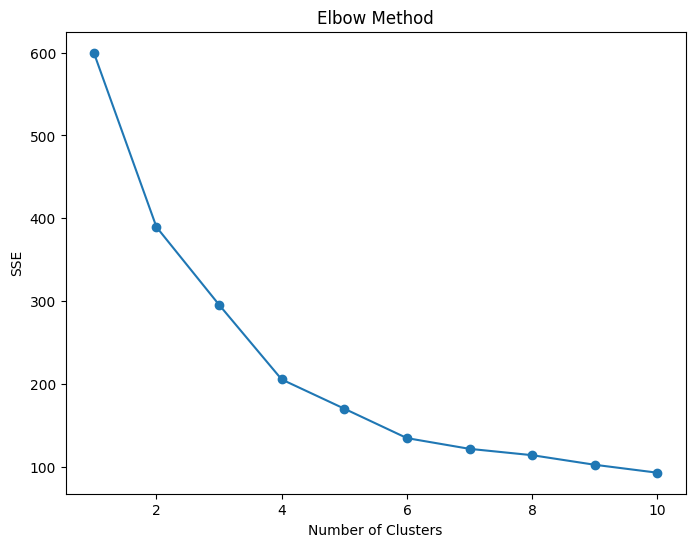

In [120]:
# Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [121]:

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


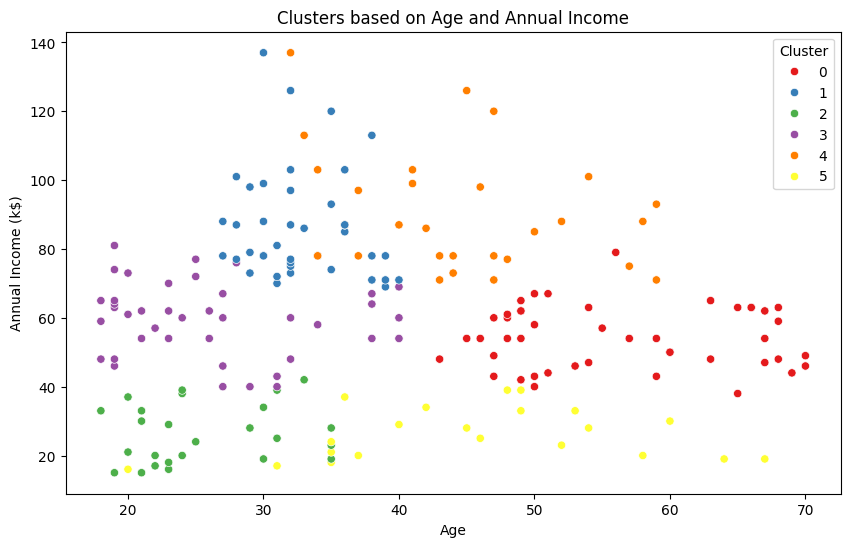

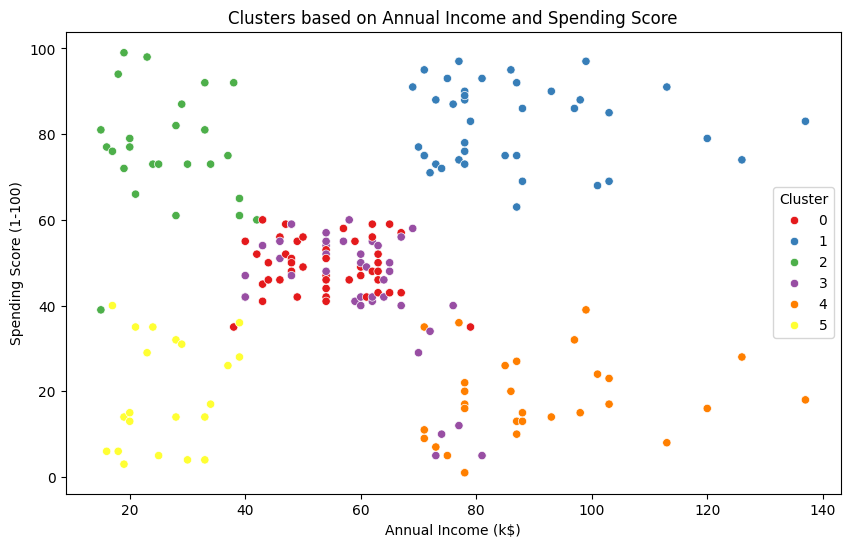

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Age vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters based on Age and Annual Income')
plt.show()

# Scatter plot for Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters based on Annual Income and Spending Score')
plt.show()


In [123]:
# Print cluster centers
print(kmeans.cluster_centers_)


[[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]


In [124]:
import numpy as np
from collections import Counter

# Assuming kmeans is your KMeans model that has been fitted to the data
labels = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = Counter(labels)

# Print the number of data points in each cluster
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} data points")


Cluster 0: 45 data points
Cluster 1: 39 data points
Cluster 2: 25 data points
Cluster 3: 40 data points
Cluster 4: 30 data points
Cluster 5: 21 data points


#Evaluation

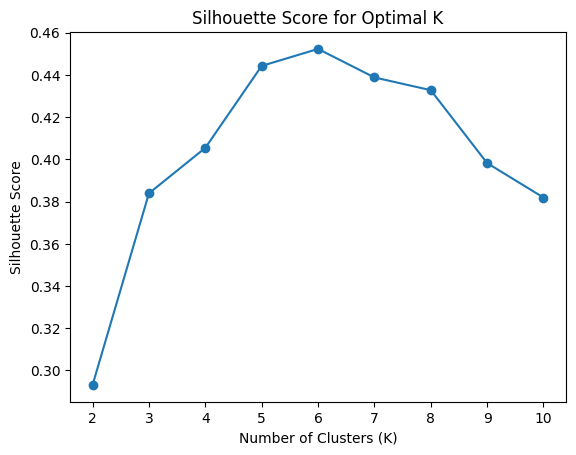

sil scores [0.293166070535953, 0.3839349967742105, 0.40546302077733304, 0.44428597560893024, 0.4523443947724053, 0.43883522027400007, 0.43280878015743623, 0.3982668308742979, 0.38193498984820856]


In [125]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()
print(f'sil scores {sil_scores}')

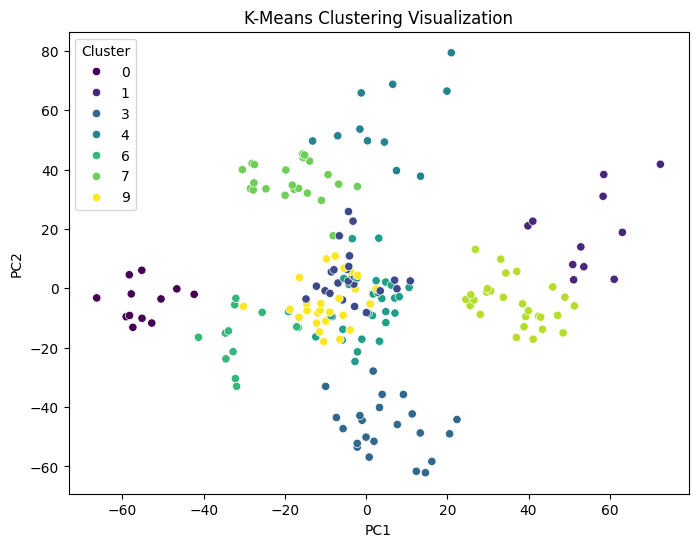

In [126]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()



In [127]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index)


Calinski-Harabasz Index: 154.4808784139401




#Deep Learning



In [129]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import numpy as np

 # Save cluster labels


In [195]:
# Define Autoencoder model
input_dim = X.shape[1]
encoding_dim = 100  # Bottleneck layer size

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)  # Extract features

autoencoder.compile(optimizer='adam', loss='mse')


In [196]:

# Train Autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3035.8618  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2993.6458 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3246.5139 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3051.9331 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2946.0916 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2923.1108 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2859.3386 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2914.6702 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2951.0249 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2998.2024 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2932.1763 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3017.2373 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2932.1750 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2981.5366 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [197]:

# Extract compressed features
X_encoded = encoder.predict(X)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [198]:
X_encoded.shape

(200, 100)

In [199]:
# Apply K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

df['Cluster'] = clusters

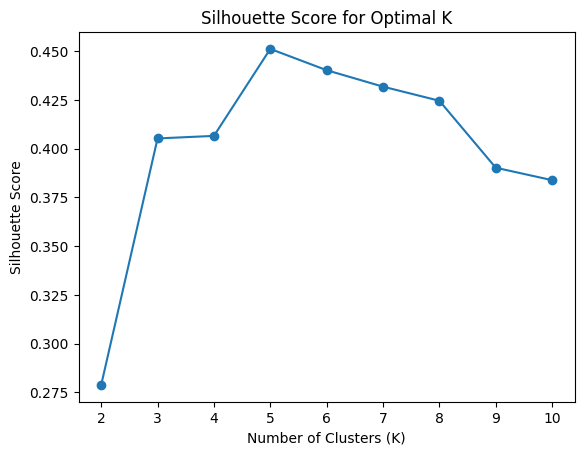

sil scores [0.2788483, 0.40529126, 0.40659687, 0.45121044, 0.44029891, 0.4318586, 0.42461562, 0.3902693, 0.38388443]


In [200]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_encoded)
    sil_scores.append(silhouette_score(X_encoded, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()
print(f'sil scores {sil_scores}')